In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/laaks/OneDrive/Documents/S'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/laaks/OneDrive/Documents/S\features.csv
C:/Users/laaks/OneDrive/Documents/S\stores.csv
C:/Users/laaks/OneDrive/Documents/S\test.csv
C:/Users/laaks/OneDrive/Documents/S\train.csv


In [3]:
# Input data files are available in the "../input/" directory.
# First let us load the datasets into different Dataframes
def load_data(datapath):
    data = pd.read_csv(datapath)
   # Dimensions
    print('Shape:', data.shape)
    # Set of features we have are: date, store, and item
    display(data.sample(10))
    return data
traindf=load_data('C:/Users/laaks/OneDrive/Documents/S/train.csv')
testdf=load_data('C:/Users/laaks/OneDrive/Documents/S/test.csv')
featuresdf=load_data('C:/Users/laaks/OneDrive/Documents/S/features.csv')
storesdf=load_data('C:/Users/laaks/OneDrive/Documents/S/stores.csv')

Shape: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
160813,17,25,23-03-2012,5071.84,False
296041,31,18,25-03-2011,968.19,False
156299,16,87,27-05-2011,6260.12,False
275992,28,91,16-09-2011,50511.51,False
87066,9,92,10-06-2011,14432.49,False
197416,20,98,18-02-2011,22039.69,False
76227,8,72,04-02-2011,56714.05,False
236149,24,92,04-11-2011,135444.72,False
175572,18,82,30-09-2011,11963.16,False
266800,27,98,05-02-2010,13579.67,False


Shape: (115064, 4)


,Store,Dept,Date,IsHoliday
23466,9,74,03-05-2013,False
70662,27,19,26-04-2013,False
18055,7,71,12-07-2013,False
29607,12,5,15-03-2013,False
103145,40,79,28-12-2012,True
11597,5,21,31-05-2013,False
78808,30,25,17-05-2013,False
107203,42,21,31-05-2013,False
98417,39,2,21-06-2013,False
109280,43,28,15-02-2013,False


Shape: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
7701,43,11-03-2011,60.24,3.459,NaN,NaN,NaN,NaN,NaN,205.988071,10.398,False
2769,16,05-11-2010,39.94,2.729,NaN,NaN,NaN,NaN,NaN,190.996438,6.986,False
3927,22,10-02-2012,35.68,3.655,10155.75,6392.28,3.34,9811.63,5448.98,141.119983,7.503,True
315,2,24-08-2012,76.91,3.620,4759.70,211.38,6.62,2972.88,5102.26,221.808352,6.565,False
3135,18,19-11-2010,45.26,3.030,NaN,NaN,NaN,NaN,NaN,132.917200,9.331,False
7121,40,16-07-2010,74.25,2.796,NaN,NaN,NaN,NaN,NaN,132.566774,5.326,False
10,1,16-04-2010,66.32,2.808,NaN,NaN,NaN,NaN,NaN,210.488700,7.808,False
8186,45,05-07-2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
4253,24,20-05-2011,59.84,4.202,NaN,NaN,NaN,NaN,NaN,134.680387,8.212,False
7735,43,04-11-2011,59.08,3.332,NaN,NaN,NaN,NaN,NaN,209.516265,10.148,False


Shape: (45, 3)


,Store,Type,Size
40,41,A,196321
2,3,B,37392
4,5,B,34875
38,39,A,184109
30,31,A,203750
1,2,A,202307
10,11,A,207499
33,34,A,158114
22,23,B,114533
29,30,C,42988


In [4]:
#DATA PREPARATION & ANALYSIS
#Merging the features and training data to get cumulative insights from overall

traindf1=traindf.merge(featuresdf,how='left',indicator=True).merge(storesdf,how='left')

In [5]:
traindf1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,05-02-2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,12-02-2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,19-02-2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,26-02-2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,05-03-2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28-09-2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,05-10-2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,12-10-2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,19-10-2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221


In [6]:
# Markdown values are typically a promotional factors and it contains 58% null values,So here Im avoiding it to perform neat analysis.

traindf2=traindf1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [7]:
traindf2.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
_merge          0
Type            0
Size            0
dtype: int64

In [8]:
# Let's check any outliers on sales values

traindf2.loc[traindf2['Weekly_Sales']<=0] #outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
846,1,6,10-08-2012,-139.65,False,85.05,3.494,221.958433,6.908,both,A,151315
2384,1,18,04-05-2012,-1.27,False,75.55,3.749,221.671800,7.143,both,A,151315
6048,1,47,19-02-2010,-863.00,False,39.93,2.514,211.289143,8.106,both,A,151315
6049,1,47,12-03-2010,-698.00,False,57.79,2.667,211.380643,8.106,both,A,151315
6051,1,47,08-10-2010,-58.00,False,63.93,2.633,211.746754,7.838,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,12-02-2010,-0.43,True,27.73,2.773,181.982317,8.992,both,B,118221
419598,45,80,19-02-2010,-0.27,False,31.27,2.745,182.034782,8.992,both,B,118221
419603,45,80,16-04-2010,-1.61,False,54.28,2.899,181.692477,8.899,both,B,118221
419614,45,80,02-07-2010,-0.27,False,76.61,2.815,182.318780,8.743,both,B,118221


In [9]:
traindf3=traindf2.loc[traindf2['Weekly_Sales']>0]
traindf4=traindf3.drop(['_merge'],axis=1)

In [10]:
traindf4.sort_values(by='Date')


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
141436,15,25,01-04-2011,8286.62,False,30.34,3.811,134.068258,7.658,B,123737
44583,5,36,01-04-2011,428.00,False,61.50,3.524,215.402441,6.489,B,34875
398073,43,1,01-04-2011,6218.97,False,67.79,3.524,206.673311,10.581,C,41062
144369,15,52,01-04-2011,1758.09,False,30.34,3.811,134.068258,7.658,B,123737
269728,28,21,01-04-2011,5695.98,False,63.63,3.772,128.719935,13.736,A,206302
...,...,...,...,...,...,...,...,...,...,...,...
366442,39,42,31-12-2010,3531.46,True,52.45,2.943,210.182398,8.476,A,184109
122489,13,36,31-12-2010,1416.00,True,26.79,2.868,127.087677,7.795,A,219622
199598,21,16,31-12-2010,958.34,True,47.19,2.943,211.064774,8.163,B,140167
165826,17,83,31-12-2010,407.96,True,20.79,2.868,127.087677,6.885,B,93188


In [11]:
traindf4['Type'].unique() #Store varities

array(['A', 'B', 'C'], dtype=object)

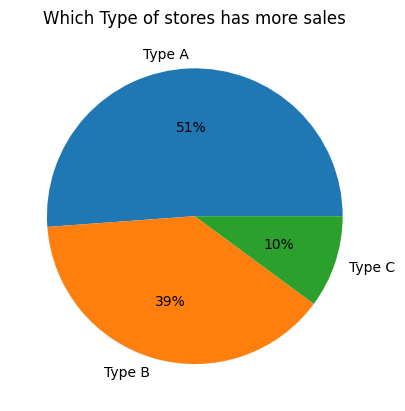

In [12]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
stores = ['Type A','Type B','Type C']

data = traindf4['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()

In [13]:
traindf4['year'] = pd.DatetimeIndex(traindf4['Date']).year #Separating year data.

                 Store      Dept  Weekly_Sales  Temperature  Fuel_Price   
Store         1.000000  0.024258     -0.085117    -0.050230    0.065321  \
Dept          0.024258  1.000000      0.148749     0.004727    0.003544   
Weekly_Sales -0.085117  0.148749      1.000000    -0.002339    0.000089   
Temperature  -0.050230  0.004727     -0.002339     1.000000    0.143700   
Fuel_Price    0.065321  0.003544      0.000089     0.143700    1.000000   
CPI          -0.211261 -0.007178     -0.021162     0.182223   -0.164199   
Unemployment  0.208759  0.007787     -0.025806     0.096768   -0.033915   
Size         -0.182763 -0.002491      0.244117    -0.058413    0.003632   
year          0.002831  0.003716     -0.010015     0.065712    0.779681   

                   CPI  Unemployment      Size      year  
Store        -0.211261      0.208759 -0.182763  0.002831  
Dept         -0.007178      0.007787 -0.002491  0.003716  
Weekly_Sales -0.021162     -0.025806  0.244117 -0.010015  
Temperature  

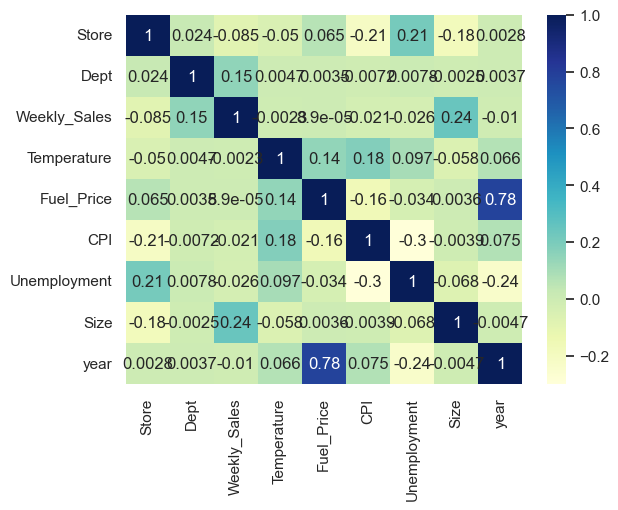

In [14]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

# import file with data
data = traindf4

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

numeric_cols = data.select_dtypes(include=[np.number]).columns
data = data[numeric_cols]


print(data.corr())

sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

In [15]:
print(traindf4.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
year              int32
dtype: object


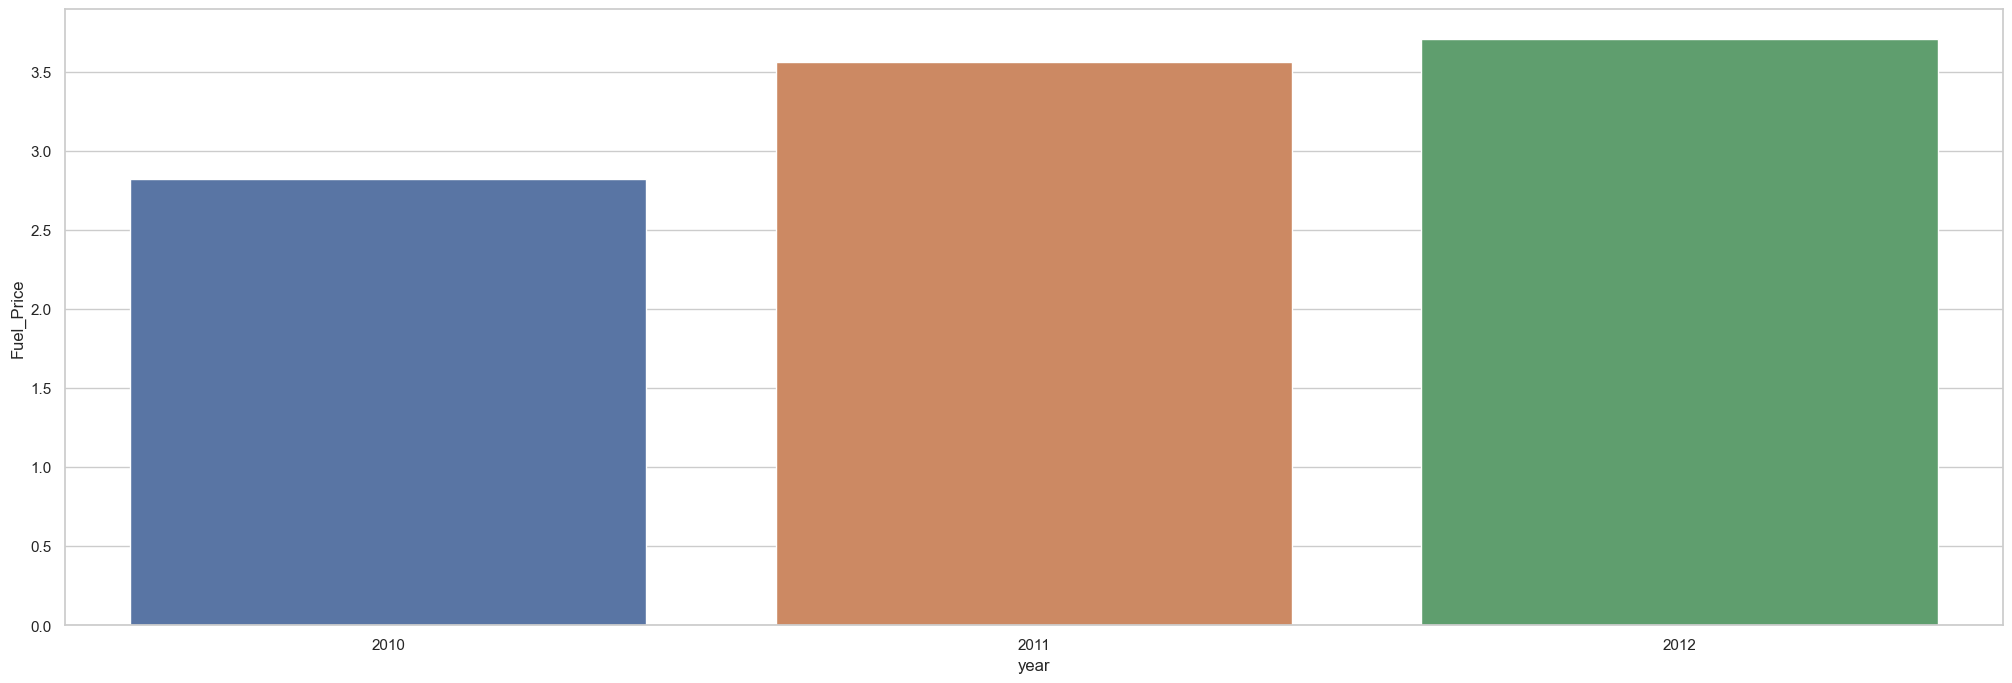

In [16]:
# Year vs Fuel_price

import seaborn as sns
sns.set_theme(style="whitegrid")
tips =traindf4
ax = sns.barplot(x="year", y="Fuel_Price", data=tips)
sns.set(rc = {'figure.figsize':(10,4)})

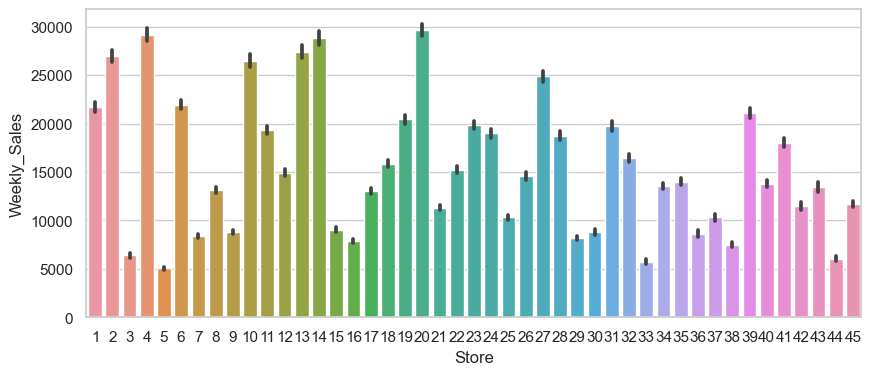

In [17]:
# Weekly sales vs Store

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf4
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)

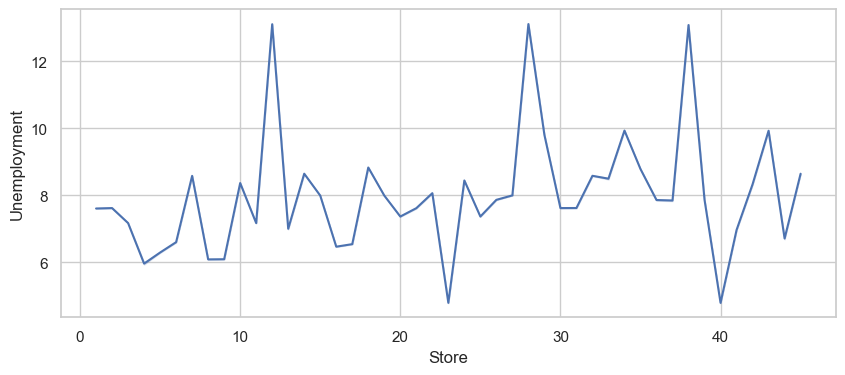

In [18]:
# Store vs Unemployment

# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = traindf4

# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=data)
plt.show()

In [19]:
traindf4

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year
0,1,1,05-02-2010,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010
1,1,1,12-02-2010,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010
2,1,1,19-02-2010,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010
3,1,1,26-02-2010,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010
4,1,1,05-03-2010,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28-09-2012,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012
421566,45,98,05-10-2012,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012
421567,45,98,12-10-2012,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012
421568,45,98,19-10-2012,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012


In [20]:
traindf4['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

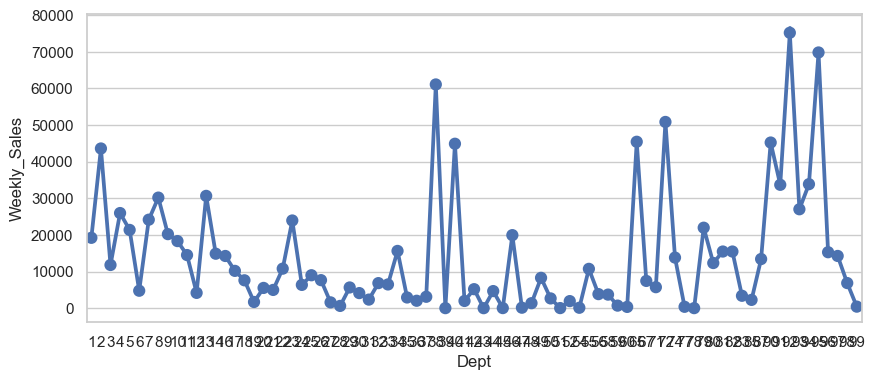

In [21]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data =traindf4

# draw pointplot
sns.pointplot(x ='Dept',
			y = "Weekly_Sales",
			data = data)
# show the plot
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()


In [22]:
traindf4['month'] = pd.DatetimeIndex(traindf4['Date']).month #extract month data

In [23]:
# Reset the index of the DatetimeIndex object
week_index = pd.DatetimeIndex(traindf4['Date']).isocalendar().week.reset_index(drop=True)

# Assign the 'week' column to traindf4
traindf4['week'] = week_index


In [24]:
traindf5=traindf4.drop(['Date'],axis=1)

<Axes: xlabel='month'>

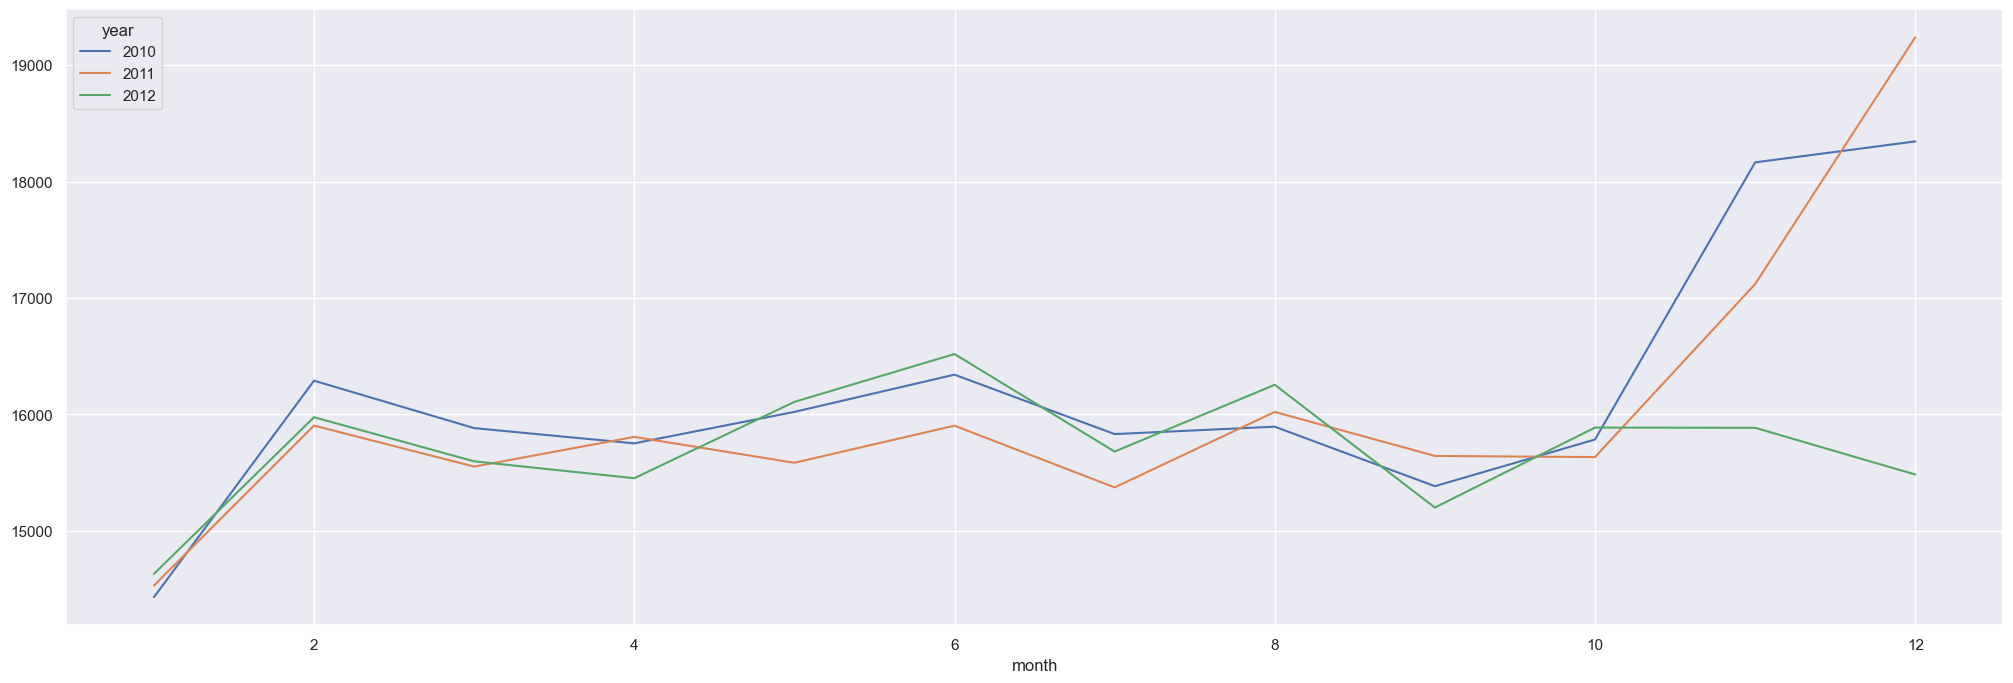

In [25]:
month_wise_sales = pd.pivot_table(traindf5, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()

In [26]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
traindf5['IsHoliday']= label_encoder.fit_transform(traindf5['IsHoliday'])
traindf5['Type']= label_encoder.fit_transform(traindf5['Type'])

traindf5

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,5,17
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,12,48
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,<NA>
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,5,<NA>
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,12,<NA>
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,<NA>


                 Store      Dept  Weekly_Sales  IsHoliday  Temperature   
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230  \
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Type          0.226352  0.003157     -0.182229  -0.001000     0.043035   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   
year          0.002831  0.003716     -0.010015  -0.056572     0.065712   
month         0.000134  0.000916      0.024981   0.332692     0.065848   
week          0.000145  0.000939      

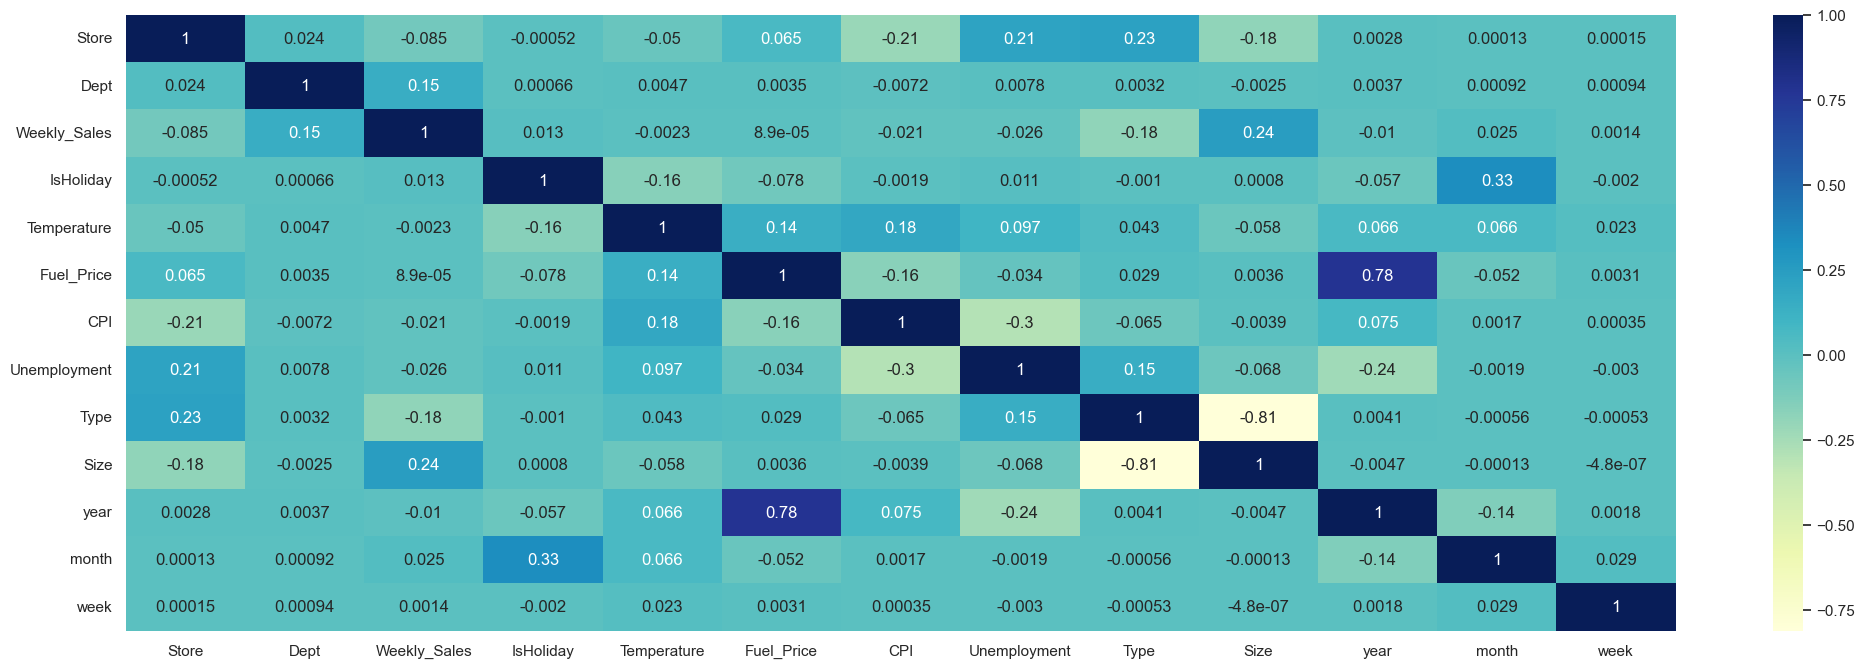

In [27]:
data = traindf5

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

In [28]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor



In [29]:

import shap

In [30]:
Features=traindf5.drop(['Weekly_Sales'],axis=1)
Target=traindf5['Weekly_Sales']

In [33]:

Target = traindf5['Weekly_Sales']

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Reshape the input data as a 2D array
Features = traindf5.drop('Weekly_Sales', axis=1)
imputed_features = imputer.fit_transform(Features)

# Create a random forest regressor and fit the imputed data
rf = RandomForestRegressor(n_estimators=100)
rf.fit(imputed_features, Target)




RandomForestRegressor()

In [34]:
Features


,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,0,42.31,2.572,211.096358,8.106,0,151315,2010,5,17
1,1,1,1,38.51,2.548,211.242170,8.106,0,151315,2010,12,48
2,1,1,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,0,46.50,2.625,211.350143,8.106,0,151315,2010,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,<NA>
421566,45,98,0,64.89,3.985,192.170412,8.667,1,118221,2012,5,<NA>
421567,45,98,0,54.47,4.000,192.327265,8.667,1,118221,2012,12,<NA>
421568,45,98,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,<NA>


<BarContainer object of 12 artists>

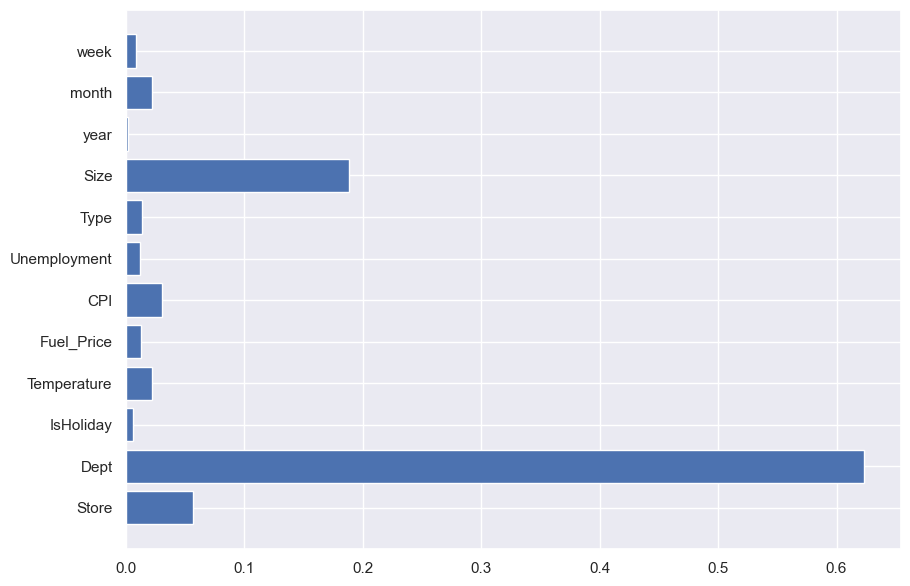

In [35]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.barh(Features.columns, rf.feature_importances_)

In [36]:
F=Features.drop(["IsHoliday",'year'],axis=1)

In [37]:
F

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,month,week
0,1,1,42.31,2.572,211.096358,8.106,0,151315,5,17
1,1,1,38.51,2.548,211.242170,8.106,0,151315,12,48
2,1,1,39.93,2.514,211.289143,8.106,0,151315,2,7
3,1,1,46.63,2.561,211.319643,8.106,0,151315,2,8
4,1,1,46.50,2.625,211.350143,8.106,0,151315,5,18
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,64.88,3.997,192.013558,8.684,1,118221,9,<NA>
421566,45,98,64.89,3.985,192.170412,8.667,1,118221,5,<NA>
421567,45,98,54.47,4.000,192.327265,8.667,1,118221,12,<NA>
421568,45,98,56.47,3.969,192.330854,8.667,1,118221,10,<NA>


In [45]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(F, Target, test_size= 0.25, random_state=0)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

# Instantiate the imputer with the default settings
imputer = SimpleImputer()

# Replace the missing values in x_train and x_test with the mean of the corresponding feature column
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Train a decision tree regressor on the preprocessed data
DTRmodel = DecisionTreeRegressor(max_depth=3, random_state=0)
DTRmodel.fit(x_train, y_train)

# Make predictions on the preprocessed test data
y_pred = DTRmodel.predict(x_test)


In [49]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.3796166061691
MSE score  : 323184793.8287025
RMSE:  17977.34112233237


In [50]:
rf1 = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)
rf1.fit(x_train,y_train)
y_pred1 = rf1.predict(x_test)

In [51]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.3796166061691
MSE score  : 68743573.24578887
RMSE:  8291.174418970384


In [53]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [54]:
y_pred2 = model.predict(x_test)

In [55]:
print("R2 score  :",r2_score(y_test, y_pred2))
print("MSE score  :",mean_squared_error(y_test, y_pred2))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred2)))

R2 score  : 0.9190277950118442
MSE score  : 42181956.569400914
RMSE:  6494.763780877709


In [56]:
y_pred2

array([23572.232  ,  -824.25085, 40306.227  , ...,  7579.6665 ,
        3384.7183 ,  9154.646  ], dtype=float32)

In [57]:
#Regularization
from sklearn.linear_model import Ridge
rr_model = Ridge(alpha=0.5)
rr_model.fit(x_train,y_train)

Ridge(alpha=0.5)

In [58]:
y_pred3 = model.predict(x_test)

In [59]:
y_pred3

array([23572.232  ,  -824.25085, 40306.227  , ...,  7579.6665 ,
        3384.7183 ,  9154.646  ], dtype=float32)

In [60]:
print("R2 score  :",r2_score(y_test, y_pred3))
print("MSE score  :",mean_squared_error(y_test, y_pred3))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred3)))

R2 score  : 0.9190277950118442
MSE score  : 42181956.569400914
RMSE:  6494.763780877709


In [61]:
y_test

198556    18526.46
342491       84.00
267645    27025.56
169044    48324.54
45102      2968.68
            ...   
323292     4156.69
22041     15252.97
261294     8461.31
212048      835.99
406506     6728.27
Name: Weekly_Sales, Length: 105053, dtype: float64